### Project: Computational models for robot-induced hallucinations in Parkinson’s Disease
### Laboratory of Cognitive Neuroscience - LNCO
### Author: Duarte Rodrigues
##### Script: This document is a test of the main functions that are used to calculate the motion features as well as it shows some tries to compute new features (both of motion and noise). For this test a single participant data is analyzed at a time for the multi-animal DLC.

##### It is not a continuous code where the last cell depends on all of the previous ones! If something specific was needed I added new cells just to do that task!

NOTE: Never forget that the results from the features are only as good and trustworthy as the DLC tracking. It will probably have jitter and other problems that of course will influence the features.

In [1]:
''' Mian library Import'''
import motionAnalysisFX
import pandas as pd
import dlc2kinematics
from matplotlib import pyplot as plt
from matplotlib.widgets import Slider,Button
import numpy as np
from scipy import signal
from IPython.display import display
import math


D:/_users/Duarte_Projects/ma_new_DB_SingleView_DownCrop-Duarte-2022-07-16/videos/Singleview_Results/HC_7-28_R_async_right_angle/HC_7-28_R_async_right_angle_DownCropDLC_dlcrnetms5_ma_new_DB_SingleView_DownCropJul16shuffle1_450000_el.h5
D:/_users/Duarte_Projects/ma_new_DB_SingleView_DownCrop-Duarte-2022-07-16/videos/Singleview_Results/HC_7-28_R_async_right_angle/HC_7-28_R_async_right_angle_standardized.h5
finger1


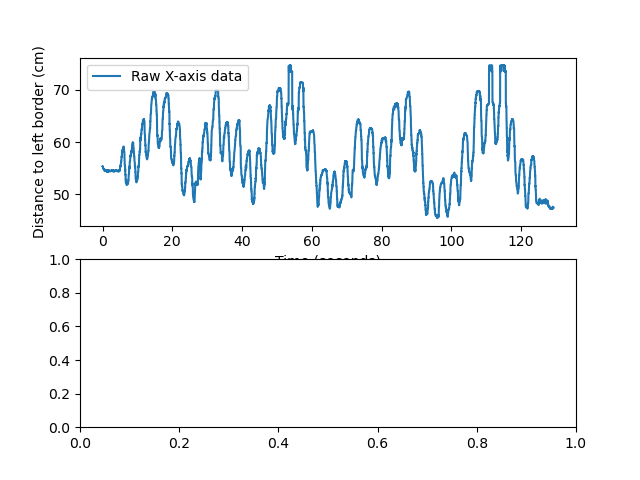

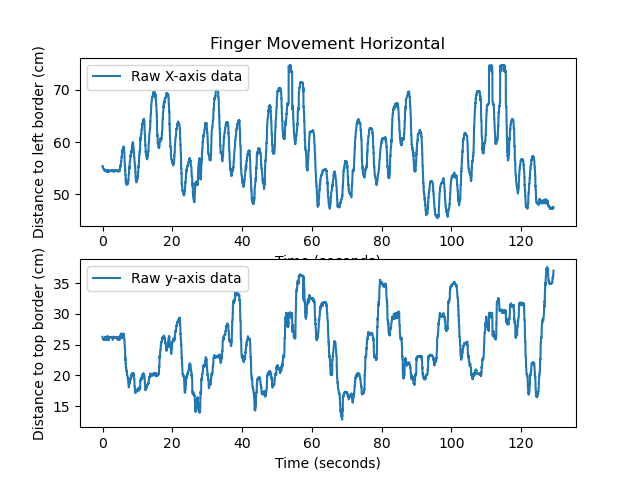

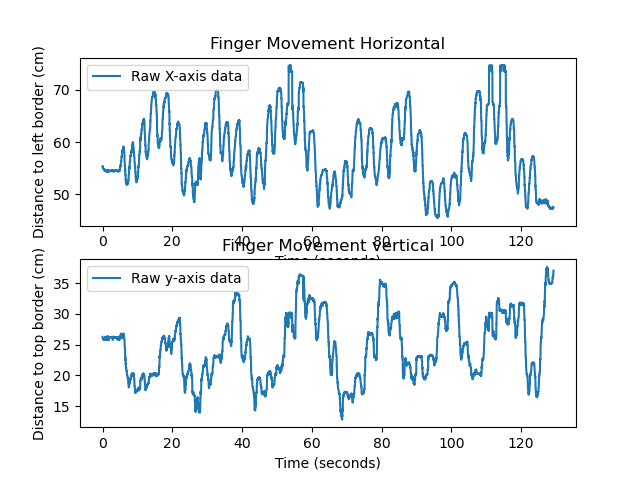

In [29]:
'''
FIRST! STANDARDIZE THE ENTIRE RESULTS FOLDER WITH ALL THE PARTICIPANTS!

In this cell you select the video that has the predictions done by DLC. It will get the frequency of sample based on the frame rate of the video,
as well as the .h5 data file with the predcitions (ideally already standardized). It should be in the same result directory as the video.

NOTE: When you run this cell, a new window opens to select the database folder with all the results. The new window
usually opens behind the code editor software.'''
from tkinter import Tk  
from tkinter.filedialog import askopenfilename
import cv2
import os
Tk().withdraw() # we don't want a full GUI, so keep the root window from appearing
video_path = askopenfilename(title='Choose Labeled video', initialdir=r'D:\_users\Duarte_Projects\ma_FullModel-Duarte-2022-07-01\videos\Fullmodel_Results') # show an "Open" dialog box and return the path to the selected file

cap=cv2.VideoCapture(video_path)
fs = cap.get(cv2.CAP_PROP_FPS)
cap.release()
directory=os.path.dirname(video_path)

for root, dirs, files in os.walk(directory):
    for name in files:
        if '.h5' in name:
            
            if 'skeleton' not in name and "standardized" in name and 'filtered' not in name:

                h5_path = directory + '/' + name
                print(h5_path)
                break
            elif 'skeleton' not in name and 'filtered' not in name:

                h5_path = directory + '/' + name
                print(h5_path)

if "standardized" in h5_path:
    st_df, scorer, individuals, bodyparts = motionAnalysisFX.load_ma_datah5(h5_path, ma=True) # Read data
else:
    # Standardizing the data
    df, scorer, individuals, bodyparts = motionAnalysisFX.load_ma_datah5(h5_path, ma=True) # Read data
    st_df = motionAnalysisFX.ma_standardize_df(df,bodyparts,scorer,individuals)
    
# Choosing the correct side of the body part that is being tracked
# Assuming that there are less than 100 participants
if os.path.basename(h5_path)[7] == 'L' or os.path.basename(h5_path)[8] == 'L': #new db 7 - 8
    bodypart = 'finger2'
elif os.path.basename(h5_path)[7] == 'R' or os.path.basename(h5_path)[8] == 'R':
    bodypart = 'finger1'

parameter = 'x' # front and back - 'y' is up and down

#Plotting the raw movement of a specific body part and comparing the X and Y movements - In the script is the finger!
%matplotlib widget
fig, axs = plt.subplots(2,1)
plt.sca(axs[0])
x_mov = st_df[scorer][individuals][bodypart][parameter]
time=motionAnalysisFX.time_list(x_mov,fs)

motionAnalysisFX.plot(time,x_mov, data_label='Raw X-axis data', x_label='Time (seconds)', y_label= 'Distance to left border (cm)')
plt.title('Finger Movement Horizontal')

plt.sca(axs[1])
y_mov = st_df[scorer][individuals][bodypart]['y'] # Reading the movement in Y
time=motionAnalysisFX.time_list(y_mov,fs)

motionAnalysisFX.plot(time,y_mov, data_label='Raw y-axis data', x_label='Time (seconds)', y_label= 'Distance to top border (cm)')
plt.title('Finger Movement vertical')

plt.show()

scorer      DLC_dlcrnetms5_ma_new_DB_SingleView_DownCropJul16shuffle1_450000  \
individuals                                                      participant   
bodyparts                                                            finger1   
coords                                                                     x   
0                                                    31.423114                 
1                                                    31.422403                 
2                                                    31.420743                 
3                                                    31.421099                 
4                                                    31.422047                 
...                                                        ...                 
7546                                                 42.218130                 
7547                                                 42.214455                 
7548                                                 42.215640                 
7549                                                 42.232712                 
7550                                                 42.236742                 

scorer                                                                         \
individuals                                                                     
bodyparts                             wrist1                           elbow1   
coords               y likelihood          x          y likelihood          x   
0            20.524839        1.0  23.396531  22.600927        1.0  12.914375   
1            20.527092        1.0  23.392975  22.602468        1.0  12.914256   
2            20.524484        1.0  23.393212  22.595592        1.0  12.913545   
3            20.521875        1.0  23.389655  22.599978        1.0  12.909396   
4            20.521994        1.0  23.394990  22.597726        1.0  12.908685   
...                ...        ...        ...        ...        ...        ...   
7546         23.437787        1.0  30.866274  24.674406        1.0  16.255890   
7547         23.453555        1.0  30.859991  24.678556        1.0  16.259565   
7548         23.446916        1.0  30.880737  24.667530        1.0  16.246880   
7549         23.453436        1.0  30.908834  24.645480        1.0  16.050676   
7550         23.412891        1.0  30.867341  24.633624        1.0  16.269286   

scorer                                        ...                         \
individuals                                   ...                          
bodyparts                          shoulder1  ... robot_joint  robot_top   
coords               y likelihood          x  ...  likelihood          x   
0            28.200270        1.0  14.858277  ...       1.000  47.943613   
1            28.203234        1.0  14.857803  ...       1.000  47.943375   
2            28.205249        1.0  14.857803  ...       1.000  47.943850   
3            28.214615        1.0  14.859344  ...       1.000  47.946695   
4            28.212955        1.0  14.860411  ...       1.000  47.944087   
...                ...        ...        ...  ...         ...        ...   
7546         28.259309        1.0  17.240229  ...       0.195  48.362102   
7547         28.240459        1.0  17.362220  ...       0.173  48.346809   
7548         28.247217        1.0  17.379528  ...       0.210  48.352855   
7549         28.300447        1.0  17.378106  ...       0.202  48.356056   
7550         28.269979        1.0  17.378343  ...       0.242  48.356886   

scorer                                                                        \
individuals                                                                    
bodyparts                        robot_base                       robot_logo   
coords              y likelihood          x          y likelihood          x   
0            9.354961        1.0  46.215357  31.297567        1.0  44.620829   
1            9.363260        1.0  46.24392

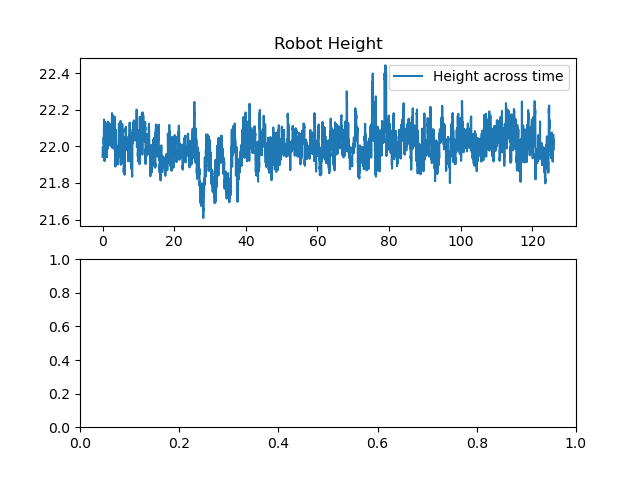

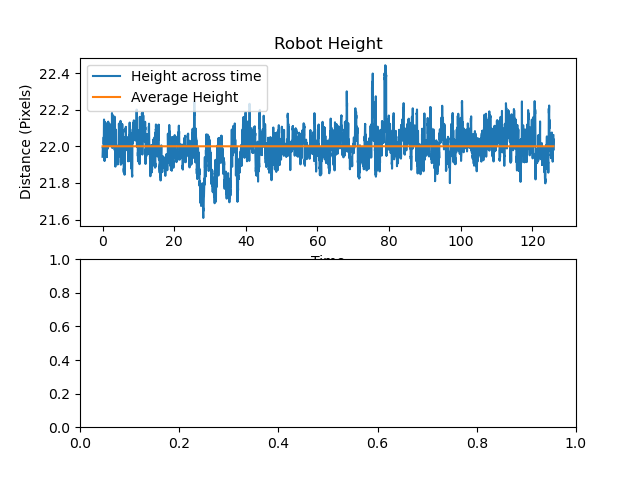

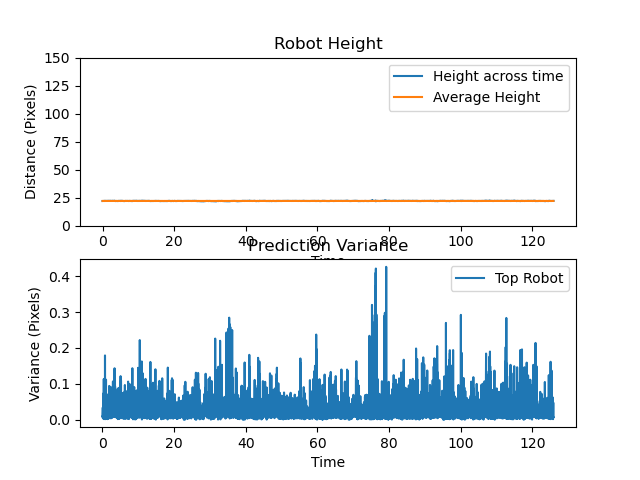

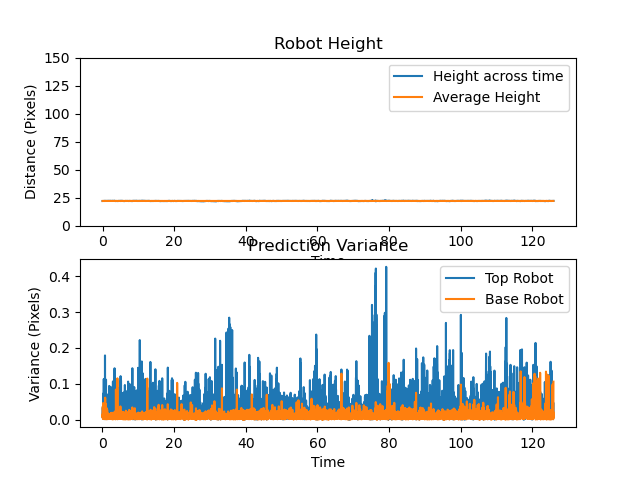

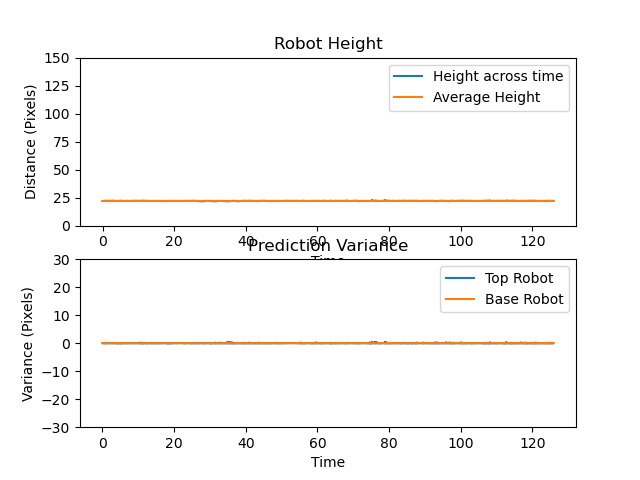

The Standard Metric is 22.0 pixels.


scorer      DLC_dlcrnetms5_ma_new_DB_SingleView_DownCropJul16shuffle1_450000  \
individuals                                                      participant   
bodyparts                                                            finger1   
coords                                                                     x   
0                                                    31.423114                 
1                                                    31.422403                 
2                                                    31.420743                 
3                                                    31.421099                 
4                                                    31.422047                 
...                                                        ...                 
7546                                                 42.218130                 
7547                                                 42.214455                 
7548                                                 42.215640                 
7549                                                 42.232712                 
7550                                                 42.236742                 

scorer                                                                         \
individuals                                                                     
bodyparts                             wrist1                           elbow1   
coords               y likelihood          x          y likelihood          x   
0            20.524839        1.0  23.396531  22.600927        1.0  12.914375   
1            20.527092        1.0  23.392975  22.602468        1.0  12.914256   
2            20.524484        1.0  23.393212  22.595592        1.0  12.913545   
3            20.521875        1.0  23.389655  22.599978        1.0  12.909396   
4            20.521994        1.0  23.394990  22.597726        1.0  12.908685   
...                ...        ...        ...        ...        ...        ...   
7546         23.437787        1.0  30.866274  24.674406        1.0  16.255890   
7547         23.453555        1.0  30.859991  24.678556        1.0  16.259565   
7548         23.446916        1.0  30.880737  24.667530        1.0  16.246880   
7549         23.453436        1.0  30.908834  24.645480        1.0  16.050676   
7550         23.412891        1.0  30.867341  24.633624        1.0  16.269286   

scorer                                        ...                         \
individuals                                   ...                          
bodyparts                          shoulder1  ... robot_joint  robot_top   
coords               y likelihood          x  ...  likelihood          x   
0            28.200270        1.0  14.858277  ...       1.000  47.943613   
1            28.203234        1.0  14.857803  ...       1.000  47.943375   
2            28.205249        1.0  14.857803  ...       1.000  47.943850   
3            28.214615        1.0  14.859344  ...       1.000  47.946695   
4            28.212955        1.0  14.860411  ...       1.000  47.944087   
...                ...        ...        ...  ...         ...        ...   
7546         28.259309        1.0  17.240229  ...       0.195  48.362102   
7547         28.240459        1.0  17.362220  ...       0.173  48.346809   
7548         28.247217        1.0  17.379528  ...       0.210  48.352855   
7549         28.300447        1.0  17.378106  ...       0.202  48.356056   
7550         28.269979        1.0  17.378343  ...       0.242  48.356886   

scorer                                                                        \
individuals                                                                    
bodyparts                        robot_base                       robot_logo   
coords              y likelihood          x          y likelihood          x   
0            9.354961        1.0  46.215357  31.297567        1.0  44.620829   
1            9.363260        1.0  46.24392

In [52]:
'''Testing the sanity_check function and showing how many pixels is the standard metric (robot height).

NOTE: Some times the jupyter bugs and the plots appear repeated. I didn't figure out how to solve this.'''

%matplotlib widget
san_check = st_df.copy()
display(st_df)

motionAnalysisFX.sanity_check(san_check,scorer,fs)
std_m = motionAnalysisFX.standard_metric(san_check)
print('The Standard Metric is '+str(np.round(std_m,2))+' pixels.')
display(st_df)

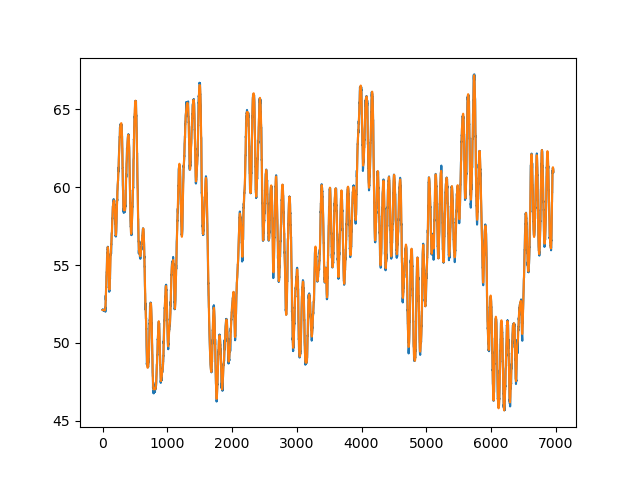

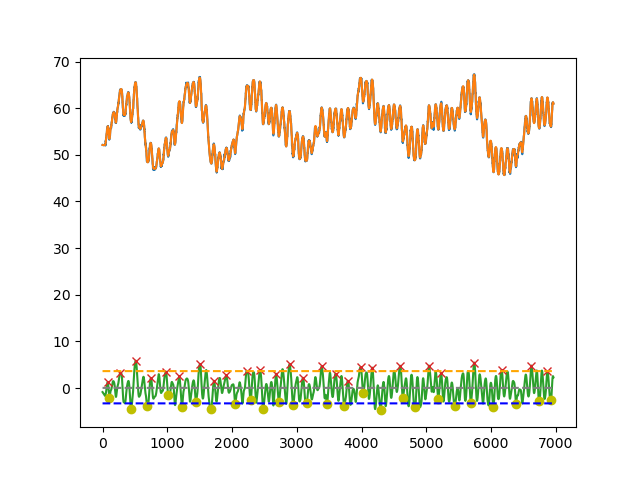

[0.607170495333812, 56.51199707973572, 4.925511044723701, 10.664720378785645, 6.9181694755634044, 0.14668076672978803, 0.07959042649178437, 2.270836231681849, 1045.810685694111]


In [14]:
'''Testing the get_features function'''
%matplotlib widget
li = motionAnalysisFX.get_features(st_df,fs,scorer,'finger1',participant_name="", plotting="True", angle="")
print(li)

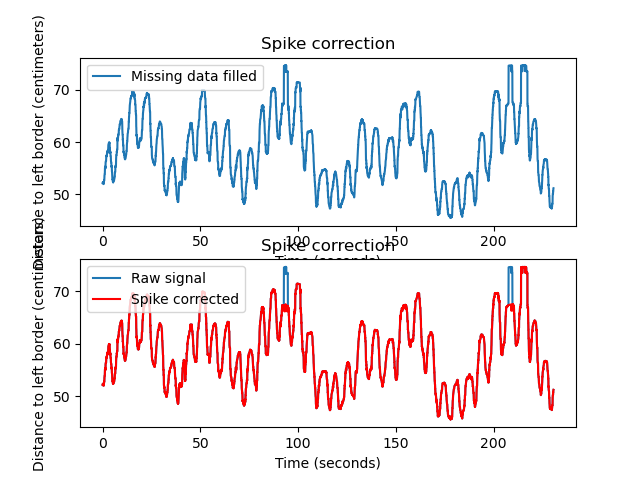

In [37]:
''' Defining a function that can get the st_df and return the optimal filtered df.

It is similar to the first part of the get_features function in MotionAnalysisFX.py'''
def get_filt_df(st_df,fs,scorer,individuals,bodypart):

    # Trimming the signal (7 sec on the begining and end) to make sure the data analysed is all of interest
    total_dur = st_df.shape[0]/fs
    if total_dur > 20: # this ensures there is enough time to crop out the extrimities 
        trim_samples = int(7*fs) # Arbitrary value given by analyzing the database

        begin = range(trim_samples)
        end = range(st_df.shape[0]-trim_samples,st_df.shape[0])
        
        st_df = st_df.drop(end)
        st_df = st_df.drop(begin)
        st_df.reset_index(drop=True,inplace=True)

    # Movement in X axis
    if motionAnalysisFX.all_nan(st_df[scorer][individuals][bodypart]['x']):
        print('This ' + bodypart + ' was not tracked! All feats NAN.')
        # nan_list=[math.nan,math.nan,math.nan,math.nan,math.nan,math.nan,math.nan]
        # if 'finger' in bodypart:
        #     nan_list.append(math.nan)
        # return nan_list
        return st_df
    else:
        
        # Cleaning Processing    
        st_df, x_mov_noisy = motionAnalysisFX.correct_NAN(st_df, scorer, bodypart, 'x', individual=individuals)
        x_mov = motionAnalysisFX.spike_removal(x_mov_noisy,plotting=True)

        extra_cut = 1.5
        psd, freq = motionAnalysisFX.PSD(x_mov, fs,plotting=False)
        iii = np.where(psd == max(psd[20:])) # only works in good siganls

        if len(iii[0])==0:
            cutoff = extra_cut
        else:
            cutoff = freq[int(iii[0])] + extra_cut # what is the frequency most proeminent in the signal

            if cutoff < extra_cut-0.1:
                cutoff = extra_cut

        filt_mov_x = motionAnalysisFX.LowPassFilter(x_mov,fs,cutoff,5,application='') # Static order

        # initializing the new filtered DF
        filt_df = st_df.copy()

        for ind in range(st_df.shape[0]):
            filt_df.iloc[ind][scorer, individuals, bodypart, 'x'] = filt_mov_x[ind]

        # Movement in Y axis
        
        st_df, y_mov_noisy = motionAnalysisFX.correct_NAN(st_df, scorer, bodypart, 'y',individual=individuals)
        y_mov = motionAnalysisFX.spike_removal(y_mov_noisy)
        
        psd, freq = motionAnalysisFX.PSD(y_mov, fs,plotting=False)
        iii = np.where(psd == max(psd[20:])) # only works in good signals

        if len(iii[0])==0:
            cutoff = extra_cut
        else:
            cutoff = freq[int(iii[0])] + extra_cut # what is the frequency most proeminent in the signal
        
            if cutoff < extra_cut-0.1:
                cutoff = extra_cut

        filt_mov_y = motionAnalysisFX.LowPassFilter(y_mov,fs,cutoff,5,application='') # Static order

        for ind in range(filt_df.shape[0]):
            filt_df.iloc[ind][scorer, individuals, bodypart, 'y'] = filt_mov_y[ind]
        
        return filt_df,filt_mov_x, x_mov
%matplotlib widget
filt_df , filt ,x_mov = get_filt_df(st_df,fs,scorer,individuals,'finger1') #for the bodypart both X and Y components are filtered


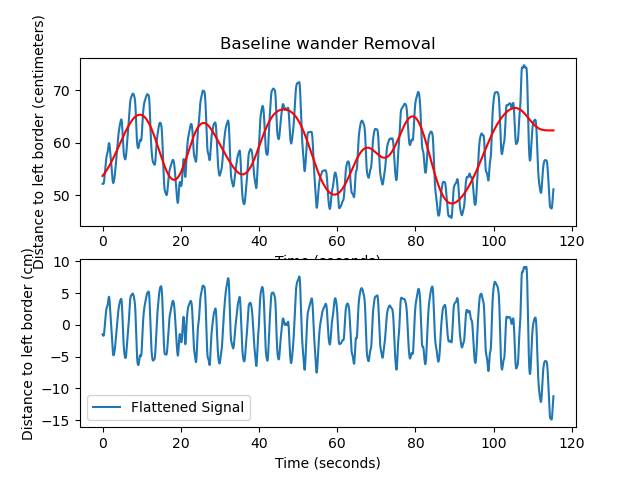

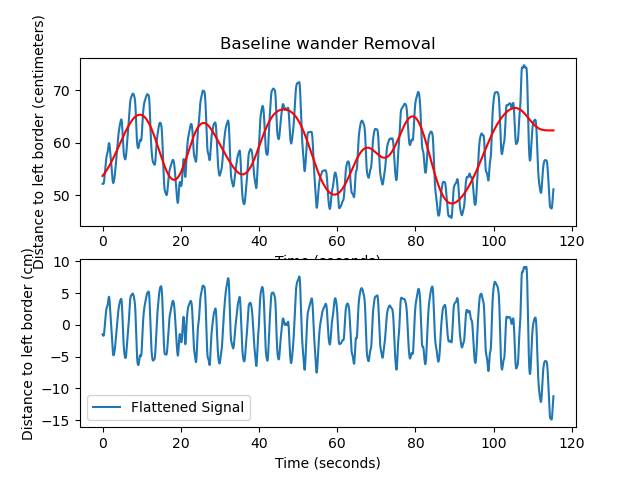

In [44]:
''' Continuation of the filtering process similar to the get_features functions. This code was written as the testing step of writing that function.'''

%matplotlib widget
ti=motionAnalysisFX.time_list(filt,fs)
flat_si=[]
low_filt_mov_x = motionAnalysisFX.LowPassFilter(x_mov,fs,0.1,5,application='') # Static order and cuttof

for i in range(len(x_mov)):

    sub = filt[i]- low_filt_mov_x[i]
    flat_si.append(sub)
flat_si = np.array(flat_si)

fig, axs = plt.subplots(2,1)
plt.sca(axs[0])
plt.plot(ti,filt,label='Filtered signal')
plt.plot(ti,low_filt_mov_x,label='Basline wander',color='red')
plt.title('Baseline wander Removal')
plt.ylabel('Distance to left border (centimeters)')
plt.xlabel('Time (seconds)')


plt.sca(axs[1])
motionAnalysisFX.plot(ti,flat_si, data_label='Flattened Signal', x_label='Time (seconds)', y_label= 'Distance to left border (cm)')


plt.show()

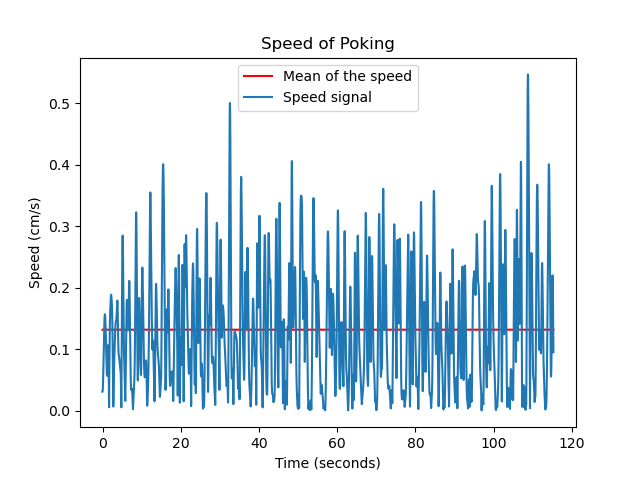

In [42]:
''' Calcualtes the speed. Since it used the finger it is the speed of poking.'''
speed_ = list(motionAnalysisFX.speed(filt_df, 'finger1', scorer, fs))
if type(flat_si) == list:
    length = len(flat_si)
else:
    length = flat_si.shape[0]


thr=[np.mean(speed_)]*length
%matplotlib widget
plt.title('Speed of Poking')
plt.plot(ti,thr,color='red',label='Mean of the speed')
motionAnalysisFX.plot(ti,speed_, data_label='Speed signal', x_label='Time (seconds)', y_label= 'Speed (cm/s)')

## Noise analysis - Jitter metric

In [ ]:
def get_jitter_signal(st_df,fs,scorer,bodypart,participant_name="", plotting="True", angle=""):
    """
    This function computes the jitter signal of a given bodypart from a motion tracking dataframe.

    Parameters:
    st_df (pandas DataFrame): Motion tracking dataframe, with columns for each body part being tracked.
    fs (int): Sampling frequency (in Hz) of the motion tracking data.
    scorer (str): Name of the person who scored the motion tracking data.
    bodypart (str): Body part for which the jitter signal is to be computed.
    participant_name (str, optional): Name of the participant. Defaults to "".
    plotting (str, optional): Whether or not to plot the raw signal and high-frequency signal. Defaults to "True".
    angle (str, optional): Angle of the body part being tracked. Defaults to "".

    Returns:
    numpy array: Array representing the jitter signal of the given body part.

    """
    if pd.MultiIndex.from_frame(st_df).get_level_values(0).name[1] == 'participant':
        st_df.columns = st_df.columns.droplevel(1)
    feats = []
    
    total_dur = st_df.shape[0]/fs
    
    # Trimming the signal (7 sec on the begining and end) to make sure the data analysed is all of interest
    if total_dur > 20: # this ensures there is enough time to crop out the extrimities 
        trim_samples = int(7*fs) # Arbitrary value given by analyzing the database

        begin = range(trim_samples)
        end = range(st_df.shape[0]-trim_samples,st_df.shape[0])
        
        st_df = st_df.drop(end)
        st_df = st_df.drop(begin)
        st_df.reset_index(drop=True,inplace=True)

    # Movement in X axis

    # Cleaning Processing
    if motionAnalysisFX.all_nan(st_df[scorer][bodypart]['x']):
        print('This ' + bodypart + ' was not tracked! All feats NAN.')
        nan_list=[math.nan,math.nan,math.nan,math.nan,math.nan,math.nan,math.nan]
        if 'finger' in bodypart:
            nan_list.append(math.nan)
        return nan_list

    st_df, x_mov_noisy = motionAnalysisFX.correct_NAN(st_df, scorer, bodypart, 'x')

    noise = motionAnalysisFX.noise_metric(x_mov_noisy,fs) # maximum noise the signal has
    x_mov = motionAnalysisFX.spike_removal(x_mov_noisy)

    # DF with the filtered signal to later calculate the speed
    psd, freq = motionAnalysisFX.PSD(x_mov, fs,plotting=False)
    iii = np.where(psd == max(psd[20:])) # only works in good siganls
    extra_cut = 1.5
    if len(iii[0])==0:
        cutoff = extra_cut
    else:
        cutoff = freq[int(iii[0])] + extra_cut # what is the frequency most proeminent in the signal

        if cutoff < extra_cut-0.1:
            cutoff = extra_cut

    # With the cutoff frequency we can isolate the jitter from the movement of interest
    noisy_sign = motionAnalysisFX.HighPassFilter(x_mov_noisy,fs,cutoff,5,application='')
    t = motionAnalysisFX.time_list(noisy_sign,fs)
    %matplotlib widget
    fig, axs = plt.subplots(2,1)
    
    plt.sca(axs[0])
    plt.title('Effect of the jitter in a signal')
    plt.plot(t, x_mov_noisy,label='Raw Signal') # raw signal
    plt.xlabel('Time (seconds)')
    plt.ylabel('Movement (cm)')
    plt.legend()
    plt.sca(axs[1])
    plt.plot(t, noisy_sign,label='High-freq signal') # just noise
    plt.xlabel('Time (seconds)')
    plt.ylabel('Noise (cm)')
      
    plt.legend()
    plt.show()
    return noisy_sign


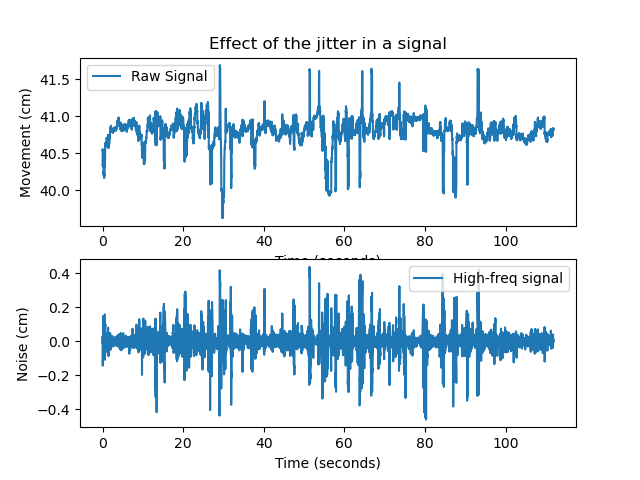

array([-0.01177167,  0.02463273,  0.03007008, ...,  0.01112721,
       -0.00837016,  0.00575902])

In [15]:
# Testing the previous function
get_jitter_signal(st_df,fs,scorer,'shoulder2')

## Movement filtering and saving new values in filt_df

In [ ]:
# As a quick test, applying the low pass filter
%matplotlib widget
filt = motionAnalysisFX.LowPassFilter(x_mov,fs,0.1,5,application='Movement')

print(x_mov.shape)
print(np.mean(filt))

In [ ]:
# PLotting to see the comparison between the lowPass and the raw signal
%matplotlib widget
plt.plot(motionAnalysisFX.time_list(filt,fs),filt)
plt.plot(motionAnalysisFX.time_list(x_mov,fs),x_mov,color='r')
plt.fill_between(motionAnalysisFX.time_list(x_mov,fs), filt, x_mov, alpha=0.4)
plt.show()

### Trying a new noise metric (not useful, but looks cool)

In [ ]:
''' The code in this cell was an attempt to create a measure of noise, by comparing the area between 2 curves (raw and filt) 
when these are superimposed. In theory a smaller are would mean that the signals are similar and a bigger area would mean they are 
very different and therefore there is a lot of noise. In practice, it is difficult to attribute a meaning to this metric and, besides this, 
between 2 different participants the values of area what is a good and bad filtered signal are very different. '''

import sympy as sy
import geopandas as gpd
from shapely.geometry import Polygon, LineString, MultiPolygon
from shapely.ops import polygonize

t = motionAnalysisFX.time_list(x_mov,fs)

# function to get the indexes of when 2 signals intercept. This points will simbolize where a new area starts and finishes
def inter(sign1,sign2):
    inter_idxlist=[]
    for i in range(len(sign1)-1):
        if sign1[i] < sign2[i] and sign1[i+1] > sign2[i+1]:
            inter_idxlist.append(i)
        elif sign1[i] > sign2[i] and sign1[i+1] < sign2[i+1]:
            inter_idxlist.append(i)
    return inter_idxlist

# To use the libraries a curve must be given which is the X|Y coordinates combined
def curve(sign):
    t = motionAnalysisFX.time_list(sign,fs)
    cur = []
    for i in range(len(sign)):
        cur.append((t[i],sign[i]))
    return cur
idx_inter = inter(x_mov,filt)
# print(len(idx_inter))



polygon_points = [] #creates a empty list where we will append the points to create the polygon

cur_x_mov = curve(x_mov)
cur_filt = curve(filt)

for xyvalue in cur_x_mov:
    polygon_points.append([xyvalue[0],xyvalue[1]]) #append all xy points for curve 1

for xyvalue in cur_filt[::-1]:
    polygon_points.append([xyvalue[0],xyvalue[1]]) #append all xy points for curve 2 in the reverse order (from last point to first point)

for xyvalue in cur_x_mov[0:1]:
    polygon_points.append([xyvalue[0],xyvalue[1]]) #append the first point in curve 1 again, so it "closes" the polygon
    

polygon = Polygon(polygon_points)
p = gpd.GeoSeries(polygon)
line = LineString([(0,75),(0,40)]) # the line doesn't matter - idk why

# union the exterior lines of the polygon with the dividing linestring
unioned = polygon.boundary.union(line)

# use polygonize geos operator and filter out poygons ouside of original input polygon
keep_polys = [poly for poly in polygonize(unioned) if poly.representative_point().within(polygon)]

# remaining polygons are the split polys of original shape
mp = MultiPolygon(keep_polys) # devides the areas in multiple polygons
# print(len(mp))
%matplotlib widget

ax = gpd.GeoSeries(list(mp.geoms)).plot(cmap='rainbow',figsize = (10,2))
# gpd.GeoSeries(list(polygon)).plot(cmap='rainbow')

plt.show()


In [ ]:
# Here I am calculating the areas and heights of the intersections
areas=[]
heights = []
for i in range(len(mp.geoms)):
    a = mp.geoms[i].area
    areas.append(a)
    b = mp.geoms[i].bounds
    if i==30:
        print(b)
    pol_height = b[3]-b[1]
    heights.append(pol_height)
 
la = np.arange(len(mp.geoms))

def norm(li):
    norm = []
    m = min(li)
    M = max(li)
    for val in li:
        norm_val=(val-m)/(M-m)
        norm.append(norm_val)
    return norm

norm_areas = norm(areas)
norm_heights = norm(heights)

%matplotlib widget

# maybe it needs to be normalized for the scele to be the same in the features of the same polygon
plt.bar(la-0.1,norm_areas, 0.2, label = 'area' )
plt.bar(la+0.1,norm_heights, 0.2, label = 'height')

# plt.ylabel('cm')
plt.legend()
plt.show()

# USE THE BOUNDS TO GET THE HEIGHT OF THE POLYGON IN ORDER TO SEE THE DIFFERENCE BETWEEN THE FILT AND RAW

### Ends the noise metric method

In [ ]:
''' Besides using the high pass to isolate jitter another way would be to subtract the good filtered signal from the raw, leaving the noise behind.'''
sub_si=[]
for i in range(len(x_mov)):
    sub = x_mov[i]-filt[i]
    sub_si.append(sub)

# Plot to see if it worked
%matplotlib widget
plt.plot(t,sub_si)
plt.plot(t, np.zeros(len(t)))
plt.show()

## Compute angular velocity

In [ ]:
# Trying to compute the angular velocity of the elbow - this would be to help create a new behavioural feature

if pd.MultiIndex.from_frame(st_df).get_level_values(0).name[1] == 'participant':
    st_df.columns = st_df.columns.droplevel(1)

joints_dict= {}
joints_dict['R-Elbow']  = ['shoulder1', 'elbow1', 'wrist1']

joint_angles = dlc2kinematics.compute_joint_angles(st_df,joints_dict)
print(joint_angles)
%matplotlib widget
plt.plot(joint_angles)
plt.show()

print((list(joint_angles))[250:7000])
filt = motionAnalysisFX.LowPassFilter(list(joint_angles),fs,2,5,application='') 
print(filt)
joint_vel = dlc2kinematics.compute_joint_velocity(joint_angles)
print(joint_vel)


## From here on down is the same as the single-animal DLC motion analysis file
###### If you want to see more detailed comments go to that .ipynb

In [ ]:
# The objective is for the SNR to be as large as possible... however this does not mean it feats the data
print(motionAnalysisFX.signaltonoise(y_mov))
print(motionAnalysisFX.signaltonoise(filt_mov_y))

In [ ]:
#Use the next function to see what is the best window for the Savitsky Golay filter
motionAnalysisFX.SavGolWindow(x_mov,30,101,2)

In [ ]:
#Write the best window value from the plot above
%matplotlib widget
filt_x_mov = signal.savgol_filter(x_mov, 173, 2)
plt.plot(filt_x_mov)
print(motionAnalysisFX.signaltonoise(filt_x_mov))
plt.show()

## Compute the velocity of finger

In [ ]:
vel_finger_x = motionAnalysisFX.velocity(filt_df,bodypart,scorer,parameter)
%matplotlib widget
t = motionAnalysisFX.time_list(vel_finger_x,fs)
plt.plot(t, vel_finger_x)

plt.show()

In [ ]:
%matplotlib widget
motionAnalysisFX.PSD(vel_finger_x, fs)

In [ ]:
%matplotlib widget
motionAnalysisFX.LowPassFilter(vel_finger_x,fs,.5,2,application='Velocity') # this works pretty good fro velocity x

In [ ]:
%matplotlib widget
motionAnalysisFX.SavGolWindow(vel_finger_x,fs,41,2)

In [ ]:
#Write the best window value from the plot above
%matplotlib widget
filt_x_vel = signal.savgol_filter(vel_finger_x, 31, 2)
t=motionAnalysisFX.time_list(filt_x_vel,fs)

plt.plot(t,filt_x_vel)
plt.show()

## Compute Speed

In [ ]:
speed_finger = motionAnalysisFX.speed(filt_df, bodypart, scorer, fs)
t = motionAnalysisFX.time_list(speed_finger,fs)

%matplotlib widget
# fig, axs = plt.subplots(2,1)
# plt.sca(axs[0])


motionAnalysisFX.plot(t,speed_finger, data_label='filt Speed data', x_label='Time (seconds)', y_label= 'Speed (std_unit)')
plt.title('Finger Speed')




# speed_fingerr = motionAnalysisFX.speed(st_df, bodypart, scorer, fs)
# tr = motionAnalysisFX.time_list(speed_fingerr,fs)

# plt.sca(axs[1])
# motionAnalysisFX.plot(tr,speed_fingerr, data_label='Raw Speed data', x_label='Time (seconds)', y_label= 'Speed (std_unit)')
# plt.title('Finger Speed')


plt.show()

In [ ]:
print(motionAnalysisFX.signaltonoise(speed_finger))

In [ ]:
%matplotlib widget
motionAnalysisFX.PSD(speed_finger, fs)

In [ ]:
%matplotlib widget

yu=motionAnalysisFX.LowPassFilter(speed_finger,fs,.75,5,application='Speed')

In [ ]:
motionAnalysisFX.SavGolWindow(speed_finger,fs,41,2)

In [ ]:
import scipy

res = scipy.ndimage.median_filter(speed_finger,size=int(fs))
t = motionAnalysisFX.time_list(res,fs)

%matplotlib widget
plt.plot(t, res)
plt.show()

In [ ]:
%matplotlib widget
motionAnalysisFX.PSD(res, fs)

In [ ]:
%matplotlib widget

motionAnalysisFX.LowPassFilter(res,fs,.5,5,application='Speed')

In [ ]:
%matplotlib widget
f, t, Sxx = signal.spectrogram(vel_finger_x, fs)
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.ylim(0,2)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()


### Compute Acceleration in one Axis

In [ ]:
accel_finger=motionAnalysisFX.accel(filt_df, bodypart, scorer, parameter)
t = motionAnalysisFX.time_list(accel_finger,fs)

%matplotlib widget
# plt.plot(t, speed_finger)
motionAnalysisFX.plot(t,accel_finger, data_label='Filt Acceleration data', x_label='Time (seconds)', y_label= 'Acceleration (std_unit)')
plt.title('Finger Acceleration')
plt.show()

In [ ]:
%matplotlib widget
motionAnalysisFX.PSD(accel_finger, fs)

## Verifying other bodyparts

In [ ]:
# getting the right number according to the side
# Assume that there are less than 100 participants
if os.path.basename(h5_path)[7] == 'L' or os.path.basename(h5_path)[8] == 'L':
    bodypart_side = '2'
elif os.path.basename(h5_path)[7] == 'R' or os.path.basename(h5_path)[8] == 'R':
    bodypart_side = '1'

# Change wich body part you want to test
bodypart = 'chin' #'shoulder' + bodypart_side
parameter = 'x'
print(bodypart)

# Comparison plots between X and Y
%matplotlib widget
fig, axs = plt.subplots(2,1)

plt.sca(axs[0])
x_mov = st_df[scorer][bodypart][parameter] #
time=motionAnalysisFX.time_list(x_mov,fs)

motionAnalysisFX.plot(time,x_mov, data_label='Raw X-axis data', x_label='Time (seconds)', y_label= 'Distance to left border (cm)')
plt.title('Finger Movement Horizontal')

plt.sca(axs[1])
y_mov = st_df[scorer][bodypart]['y'] #
time=motionAnalysisFX.time_list(y_mov,fs)

motionAnalysisFX.plot(time,y_mov, data_label='Raw y-axis data', x_label='Time (seconds)', y_label= 'Distance to top border (cm)')
plt.title('Finger Movement vertical')

plt.show()

## Creating a 3D graph of how the movement is done (time, X, Y)

In [54]:
''' Code snippet to get both the filtered X and Y valyes (supposing you didn't want to run every previous cell just to get here -  the beauty of notebooks)'''
x_mov = motionAnalysisFX.spike_removal(x_mov)

extra_cut = 1.5
# DF with the filtered signal to later calculate the speed
psd, freq = motionAnalysisFX.PSD(x_mov, fs,plotting=False)
iii = np.where(psd == max(psd[20:])) # only works in good siganls

if len(iii[0])==0:
    cutoff = extra_cut
else:
    cutoff = freq[int(iii[0])] + extra_cut # what is the frequency most proeminent in the signal

    if cutoff < extra_cut-0.1:
        cutoff = extra_cut

filt_mov_x = motionAnalysisFX.LowPassFilter(x_mov,fs,cutoff,5,application='') # Static order

# Movement in Y axis

y_mov = motionAnalysisFX.spike_removal(y_mov)

psd, freq = motionAnalysisFX.PSD(y_mov, fs,plotting=False)
iii = np.where(psd == max(psd[20:])) # only works in good signals

if len(iii[0])==0:
    cutoff = extra_cut
else:
    cutoff = freq[int(iii[0])] + extra_cut # what is the frequency most proeminent in the signal

    if cutoff < extra_cut-0.1:
        cutoff = extra_cut

filt_mov_y = motionAnalysisFX.LowPassFilter(y_mov,fs,cutoff,5,application='') # Static order


In [55]:
t = motionAnalysisFX.time_list(filt_mov_y,fs)

C:\Users\duteixei\AppData\Local\Temp\ipykernel_16488\1014910148.py:6: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


Text(0.5, 0, 'Y')

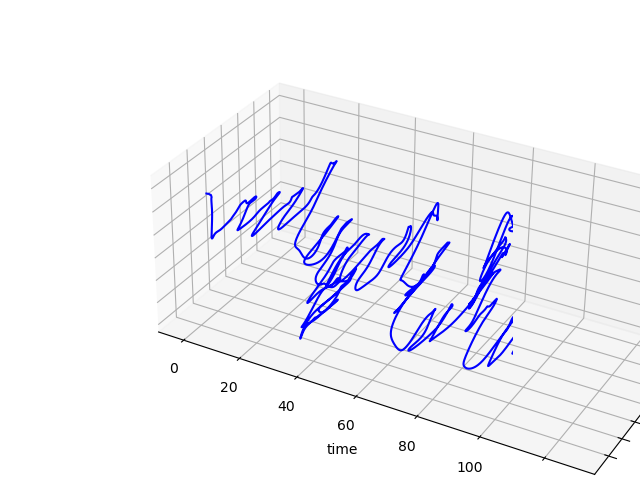

In [67]:
''' Creating the 3D plot - It gets a bit weird in the jupyter notebook! It seems like the graph gets cropped if it is not tilted correctly. It is just one more bug from the editor.'''
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
%matplotlib widget
fig = plt.figure()

ax = fig.gca(projection='3d')

ax.get_proj = lambda: np.dot(Axes3D.get_proj(ax), np.diag([1, 0.5, 0.5,0.5])) # Best possible axis configuration to get the whole plot.
# ax.plot3D(t, x_mov, y_mov, 'red')
ax.plot3D(t, filt_mov_x, filt_mov_y, 'blue')
ax.set_xlabel('time')#  each task is usually 120 seconds long, on average
# ax.set_xlim(0,120) 
ax.set_ylabel('X') # The downcropped videos have a width of 512
# ax.set_ylim(0,int(512/std_m))
ax.set_zlabel('Y') # The downcropped videos have a height of 288
# ax.set_zlim(0,int(288/std_m))
